Importing all required packages

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV, train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, classification_report
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import randint
from sklearn.linear_model import LinearRegression 
from sklearn.impute import SimpleImputer

call the dataset

convert sex into data (1s and 0s)

In [29]:
df = pd.read_csv('train.csv') #traing data
y = pd.read_csv('test.csv') #testing data



df['Sex'] = df['Sex'].replace({'male': 1, 'female': 0})
df

C:\Users\zeidh\AppData\Local\Temp\ipykernel_18416\907216499.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'male': 1, 'female': 0})


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [30]:
# Shape of training data (num_rows, num_columns)
print(df.shape)

# Number of missing values in each column of training data
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

(891, 12)
Age         177
Cabin       687
Embarked      2
dtype: int64


In [31]:
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",0,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",1,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",0,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S


description of dataset

In [32]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


Survived variable

In [33]:
x = df.drop(["Survived"], axis=1)
x_survived = df['Survived']

In [34]:
x_survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

drop unwanted colomns

In [35]:
x = x.drop(['PassengerId','Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1)
print(x.duplicated())
x


0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Length: 891, dtype: bool


,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000
887,1,0,19.0,0,0,30.0000
888,3,0,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


visualizing the dataset

In [36]:

imputer = SimpleImputer(missing_values = np.nan, 
                        strategy ='mean')

print("Original Data : \n", x)
# Fitting the data to the imputer object
imputer = imputer.fit(x)
 
# Imputing the data     
data = imputer.transform(x)
 
print("Imputed Data : \n", x)

Original Data : 
      Pclass  Sex   Age  SibSp  Parch     Fare
0         3    1  22.0      1      0   7.2500
1         1    0  38.0      1      0  71.2833
2         3    0  26.0      0      0   7.9250
3         1    0  35.0      1      0  53.1000
4         3    1  35.0      0      0   8.0500
..      ...  ...   ...    ...    ...      ...
886       2    1  27.0      0      0  13.0000
887       1    0  19.0      0      0  30.0000
888       3    0   NaN      1      2  23.4500
889       1    1  26.0      0      0  30.0000
890       3    1  32.0      0      0   7.7500

[891 rows x 6 columns]
Imputed Data : 
      Pclass  Sex   Age  SibSp  Parch     Fare
0         3    1  22.0      1      0   7.2500
1         1    0  38.0      1      0  71.2833
2         3    0  26.0      0      0   7.9250
3         1    0  35.0      1      0  53.1000
4         3    1  35.0      0      0   8.0500
..      ...  ...   ...    ...    ...      ...
886       2    1  27.0      0      0  13.0000
887       1    0  19.

In [37]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000
887,1,0,19.0,0,0,30.0000
888,3,0,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


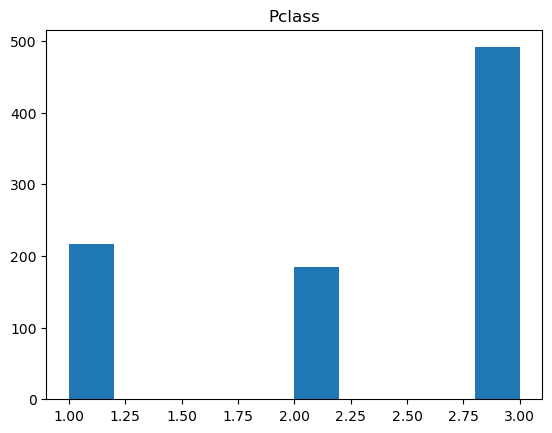

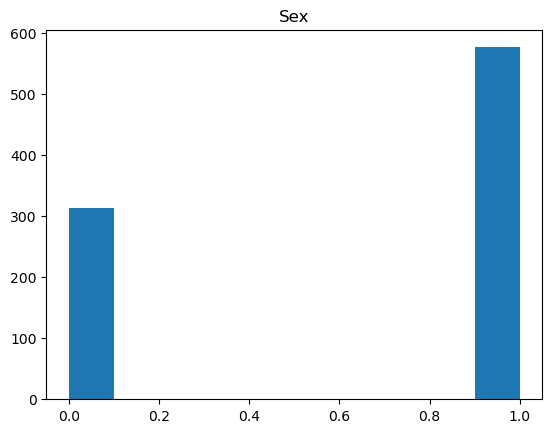

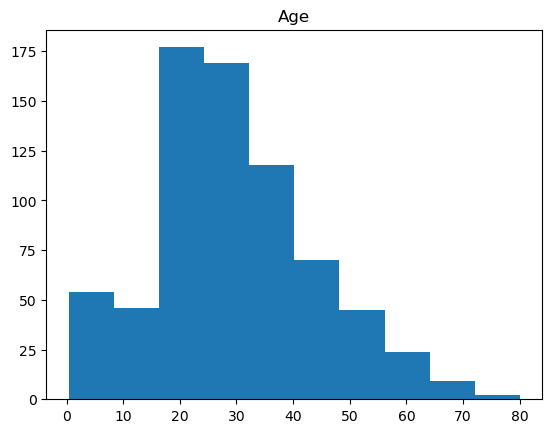

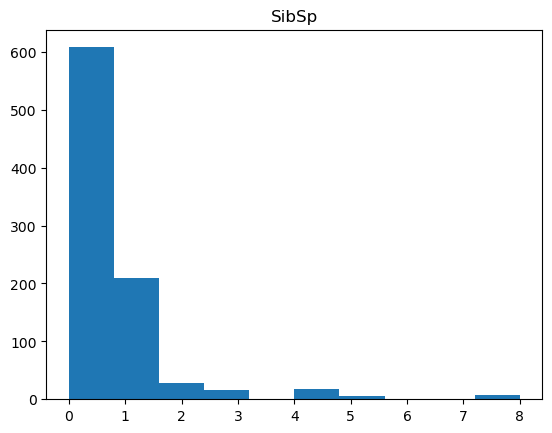

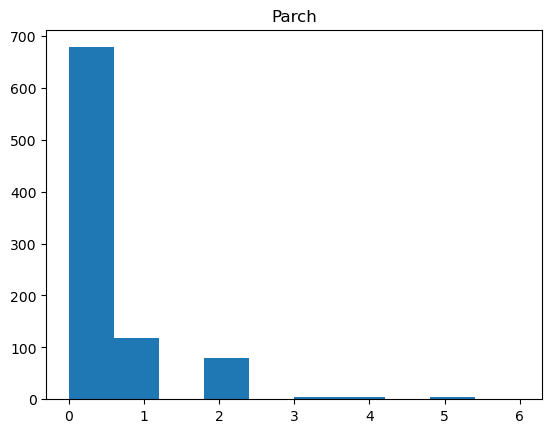

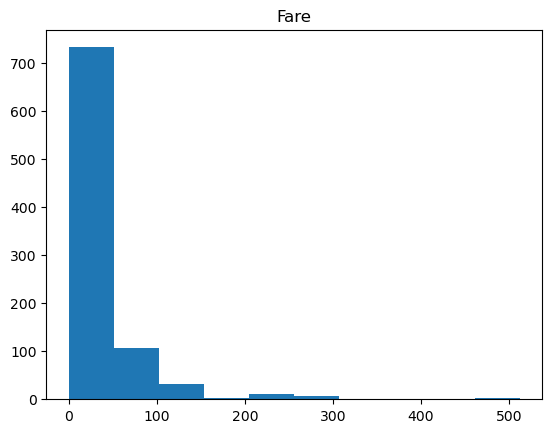

In [38]:
for i in x.columns:
    plt.hist(x[i])
    plt.title(i)
    plt.show()

<Axes: >

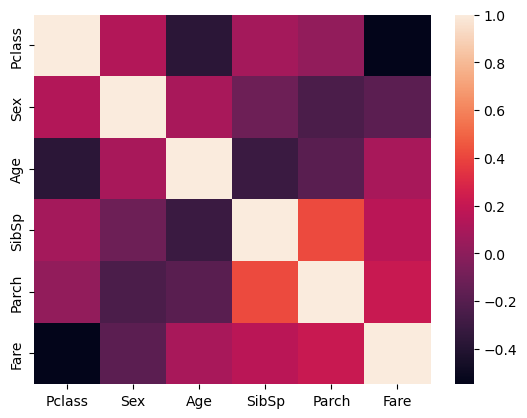

In [39]:
import seaborn as sns
sns.heatmap(x.corr())

dropping embarked (tried one hot encoding but the accuracy lowers)

split train test data

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, x_survived)



randomforest implementation

In [41]:
# Reduce the search space
param_dist = {
    'n_estimators': randint(50, 200),  
    'max_depth': randint(5, 15)  
}

# Create a random forest classifier
rf = RandomForestClassifier( n_estimators=700,  max_depth=30)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(
    rf, 
    param_distributions=param_dist, 
    n_iter=3,  
    cv=3,  
    n_jobs=-1,  
    verbose=1  
)

rand_search.fit(x_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=30,
                                                    n_estimators=700),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D58749EF60>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D586D1C950>},
                   verbose=1)

best module parameters

In [42]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 10, 'n_estimators': 151}


In [43]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare
671,1,1,31.0,1,0,52.0000
771,3,1,48.0,0,0,7.8542
774,2,0,54.0,1,3,23.0000
783,3,1,NaN,1,2,23.4500
130,3,1,33.0,0,0,7.8958
...,...,...,...,...,...,...
474,3,0,22.0,0,0,9.8375
414,3,1,44.0,0,0,7.9250
353,3,1,25.0,1,0,17.8000
472,2,0,33.0,1,2,27.7500


In [44]:

y_pred = best_rf.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

classification report

In [45]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       139
           1       0.82      0.67      0.74        84

    accuracy                           0.82       223
   macro avg       0.82      0.79      0.80       223
weighted avg       0.82      0.82      0.82       223



confusion matrix

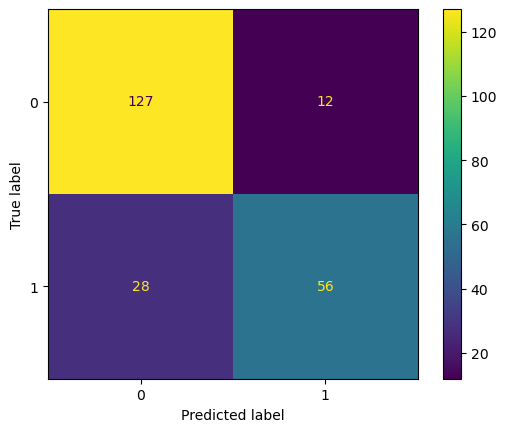

In [46]:
# Generate predictions with the best model
y_pred = best_rf.predict(x_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

feature importance

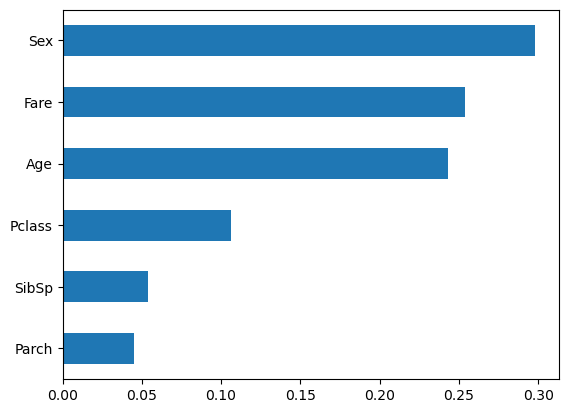

In [47]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=x_train.columns).sort_values(ascending=True)

# Select the top 10 features 
top_features = feature_importances.tail(10)

# Plot the top 10 features
top_features.plot.barh();

ROC curve

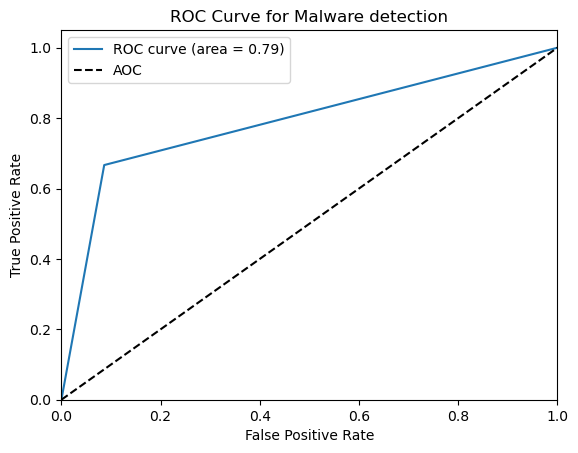

In [48]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred) 

roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='AOC')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Malware detection')
plt.legend()
plt.show()

In [49]:

y

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


making y similar to x

In [50]:
y = y.drop(['PassengerId','Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1)

y['Sex'] = y['Sex'].replace({'male': 1, 'female': 0})
y

C:\Users\zeidh\AppData\Local\Temp\ipykernel_18416\3827479261.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y['Sex'] = y['Sex'].replace({'male': 1, 'female': 0})


,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.5,0,0,7.8292
1,3,0,47.0,1,0,7.0000
2,2,1,62.0,0,0,9.6875
3,3,1,27.0,0,0,8.6625
4,3,0,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500
414,1,0,39.0,0,0,108.9000
415,3,1,38.5,0,0,7.2500
416,3,1,NaN,0,0,8.0500


predicting the module

In [51]:
test_pred = best_rf.predict(y)

survived = 0
total = len(test_pred)
for i in test_pred:
    if i == 1:
        survived += 1

print (f'{round((survived/total)*100, 2)}% of the passengers has been identified as an survived')

33.49% of the passengers has been identified as an survived


In [52]:
y = pd.read_csv("test.csv")

submitting into csv file

In [53]:
submission = pd.DataFrame({
    'PassengerId': y['PassengerId'],  
    'survived': test_pred
})

# Save the submission as a CSV file
submission.to_csv('titanicpred.csv', index=False)

print("Submission saved as titanicpred.csv")

Submission saved as titanicpred.csv


Learning curve for the module:

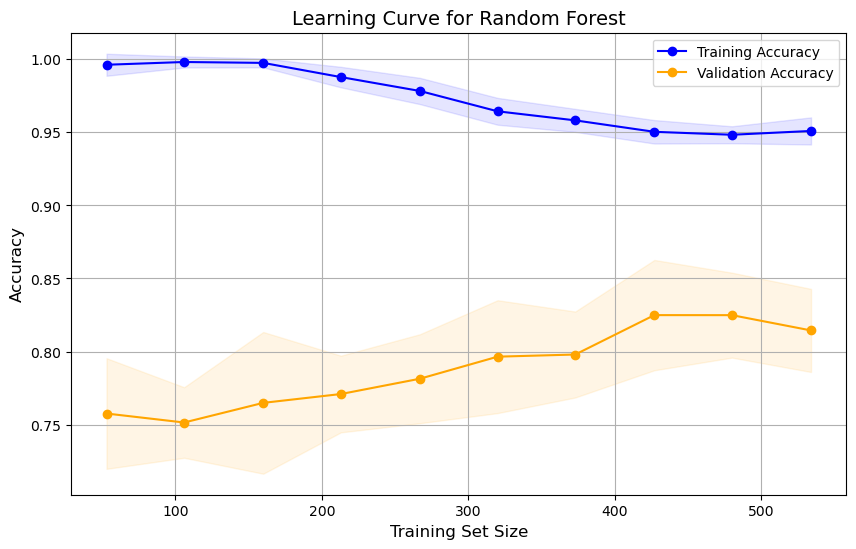

In [54]:
# Function to plot learning curve

def plot_learning_curve(model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)):   

    # Compute learning curve (use n_jobs=1 to avoid parallelization issues)
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=cv, train_sizes=train_sizes, scoring="accuracy"
    )

    # Calculate mean and standard deviation
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, "o-", color="blue", label="Training Accuracy")
    plt.plot(train_sizes, val_mean, "o-", color="orange", label="Validation Accuracy")

    # Fill between standard deviation
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="orange")

    # Labels and title
    plt.xlabel("Training Set Size", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.title("Learning Curve for Random Forest", fontsize=14)
    plt.legend(loc="best")
    plt.grid()

    # Show plot
    plt.show()

# Call the function with the optimized model
plot_learning_curve(best_rf, x_train,y_train,cv=5)